In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Handling initial data file

In [2]:
df = pd.read_excel("rawdata\online_retail_II.xlsx", parse_dates=["InvoiceDate"], sheet_name=[0,1])

In [3]:
#Check number of rows and columns from the first spreadsheet "Year 2009-2010"
df[0].shape

(525461, 8)

In [4]:
#Check number of rows and columns from the second spreadsheet "Year 2010-2011"
df[1].shape

(541910, 8)

In [5]:
#Merge booth sheets into one dataframe
df_retail_data = pd.concat([df[0], df[1]])

In [6]:
#Check number of rows and columns for whole dataframe
df_retail_data.shape

(1067371, 8)

In [7]:
#See the first 5 records
df_retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In the next commands we will explore the data, in order to help us to define the objective

In [8]:
# Total of products
len(df_retail_data['StockCode'].unique())

5305

In [9]:
# List of countries
df_retail_data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [10]:
# Total of countries
len(df_retail_data['Country'].unique())

43

In [11]:
# Total of clients
len(df_retail_data['Customer ID'].unique())

5943

In [12]:
#Checking null values
df_retail_data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
#Manipulation
#Make the cancel invoices (Invoice starting with 'C') to be considered as negative, then all further aggregation will reflect the real amounts
df_retail_data.loc[df_retail_data['Invoice'].str.startswith('C', na=False),'Price'] *= -1

In [14]:
#Manipulation
#Create calculated column: TotalAmount = Quantity * Price
df_retail_data['TotalAmount'] = df_retail_data['Quantity'] * df_retail_data['Price']

In [15]:
#Create another dataframe indexed by the date, to do some exploratory tests with different frequencies
df_retail_data_indexed = df_retail_data[['InvoiceDate','TotalAmount']]
df_retail_data_indexed.index = df_retail_data_indexed['InvoiceDate']

In [16]:
#Monthly data
df_grouped_monthly = df_retail_data_indexed.groupby(pd.Grouper(freq='M'))

In [17]:
#Columns count - by month
df_grouped_monthly.sum()

,TotalAmount
InvoiceDate,
2009-12-31,851524.410
2010-01-31,681384.112
2010-02-28,573588.046
2010-03-31,901291.501
2010-04-30,665288.832
2010-05-31,704394.890
2010-06-30,824753.670
2010-07-31,638125.940
2010-08-31,737773.480


In [18]:
#Daily data
df_grouped_daily = df_retail_data_indexed.groupby(pd.Grouper(freq='D'))

In [19]:
#Columns count - by day
df_grouped_daily.sum()

,TotalAmount
InvoiceDate,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05
...,...
2011-12-05,119732.60
2011-12-06,59198.05
2011-12-07,75802.10


In [20]:
#Hourly data
df_grouped_hourly = df_retail_data_indexed.groupby(pd.Grouper(freq='1h'))

In [21]:
#Columns count - by hour
df_grouped_hourly.sum()

,TotalAmount
InvoiceDate,
2009-12-01 07:00:00,651.10
2009-12-01 08:00:00,0.00
2009-12-01 09:00:00,5165.23
2009-12-01 10:00:00,4921.76
2009-12-01 11:00:00,6398.01
...,...
2011-12-09 08:00:00,3581.93
2011-12-09 09:00:00,340181.21
2011-12-09 10:00:00,19888.11


## Problem Definition

The group decided to go ahead with the following time series study: **"Predict daily billing amount"**

In [22]:
#Use the data from the daily frequency as our main source
df_final_data = df_grouped_daily.sum()

## Create CSV file

In [23]:
#Check the structure
df_final_data.head()

,TotalAmount
InvoiceDate,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05


In [24]:
#Check the dataframe size
df_final_data.shape

(739, 1)

In [25]:
#Rename the 'InvoiceDate' Column to 'Date' (index) and 'TotalAmount' to 'Amount'
df_final_data=df_final_data.rename(columns = {'TotalAmount':'Amount'})
df_final_data.index.names = ['Date']

In [26]:
df_final_data.head()

,Amount
Date,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05


In [27]:
#Create CSV with daily amounts removind the days without sales (should we?)
df_final_data[df_final_data['Amount'] > 0].to_csv("./data/1-retail_daily_amount.csv")

## Read Time Series

In [28]:
#Let's read the same file as a time series
ts_data = pd.read_csv('./data/1-retail_daily_amount.csv', index_col='Date', parse_dates=True)

In [29]:
ts_data.head()

,Amount
Date,
2009-12-01,55853.97
2009-12-02,63941.43
2009-12-03,79982.77
2009-12-04,41119.44
2009-12-05,9803.05


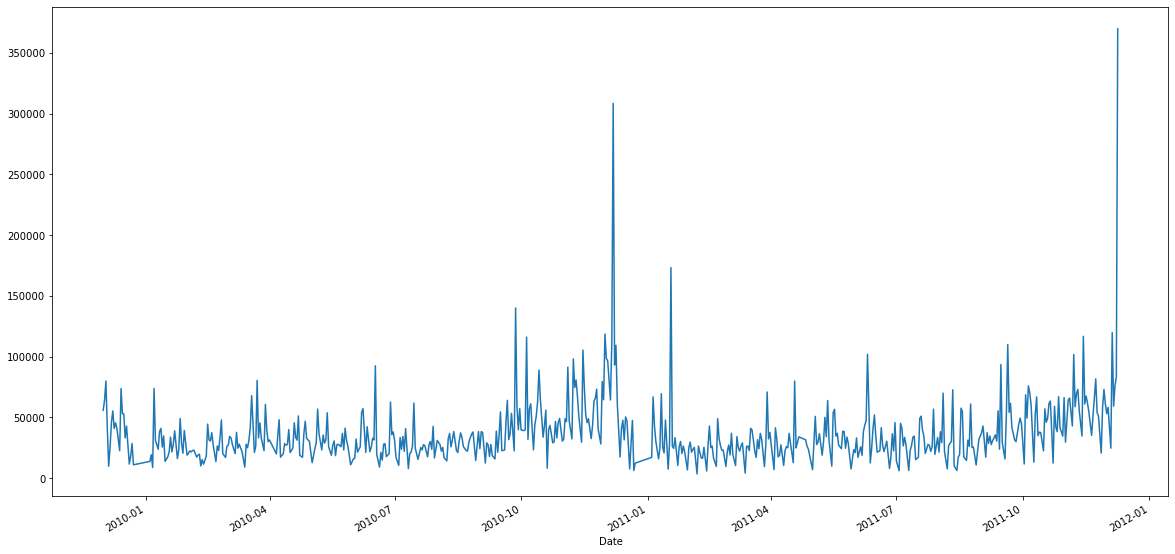

In [30]:
#Plot the time series

plt.figure(figsize=(20,10)) 
ts_data.Amount.plot().get_figure()
plt.show()

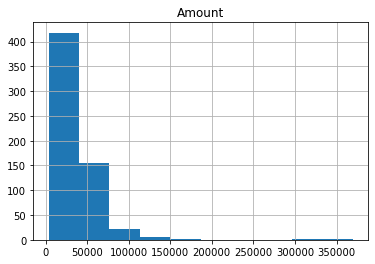

In [31]:
#Plot the histogram

ts_data.hist()
plt.show()

In [32]:
#Log the Amount to make it more stable
ts_data['Amount'] = np.log(ts_data['Amount'])

In [33]:
ts_data.head()

,Amount
Date,
2009-12-01,10.930496
2009-12-02,11.065723
2009-12-03,11.289567
2009-12-04,10.624236
2009-12-05,9.190449


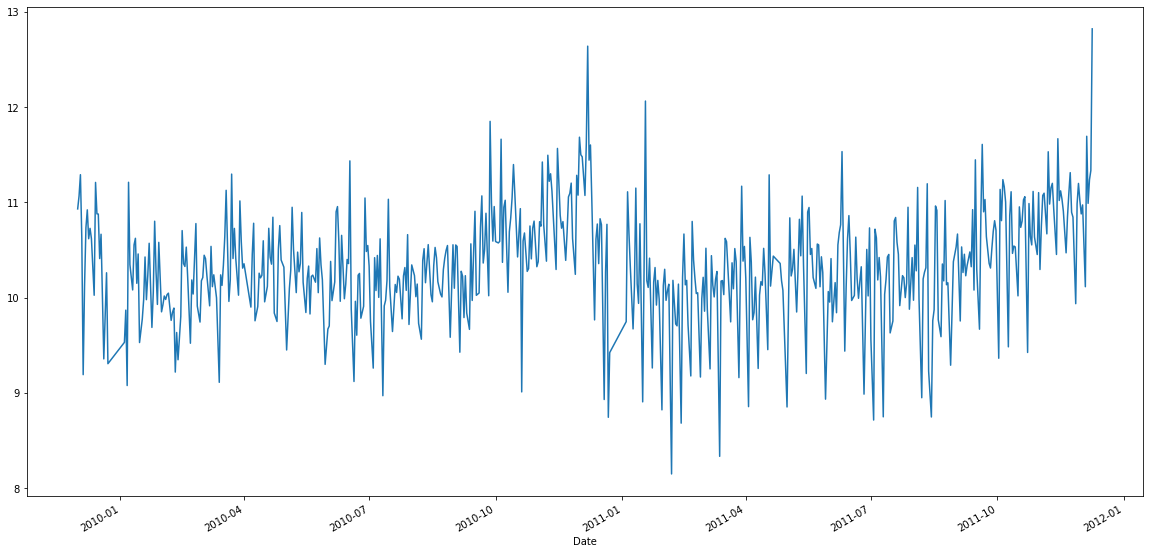

In [34]:
#Plot the time series with log
plt.figure(figsize=(20,10)) 
ts_data.Amount.plot().get_figure()
plt.show()

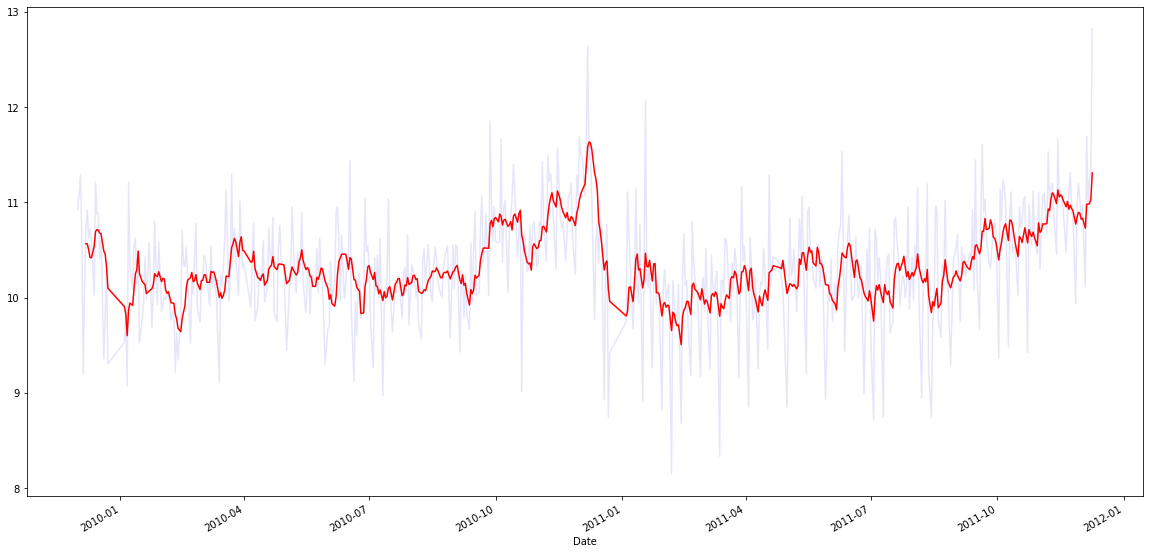

In [38]:
# Rolling - Now let's use the moving average with 7 days, to smooth the data reflecting the weekly tendency
plt.figure(figsize=(20,10)) 

ts_data_roll = ts_data.rolling(window=7)#7 days
ts_data_r_mean = ts_data_roll.mean()

ts_data.Amount.plot(color='lavender')#Old data
ts_data_r_mean.Amount.plot(color='red')#Moving-average data

plt.show()

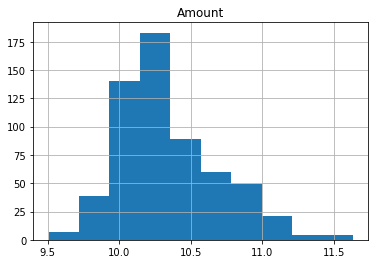

In [39]:
#Plot the histogram after log and smoothing

ts_data_r_mean.hist()
plt.show()

In [42]:
#Create the csv file with the adjustments
ts_data_r_mean[ts_data_r_mean['Amount'] > 0].to_csv("./data/2-steady_retail_daily_amount.csv")